In [ ]:
import os
import sys
import time
import tensorflow as tf
import numpy as np

In [ ]:
_NUM_CLASSES = 10
_MODEL_DIR = "model_name"
_NUM_CHANNELS = 1
_IMG_SIZE = 28
_LEARNING_RATE = 0.01
_NUM_EPOCHS = 50
_BATCH_SIZE = 2048

In [ ]:
class Model(object):
    def __call__(self, inputs):
        net = tf.layers.conv2d(inputs, 32, [5, 5],         
            activation=tf.nn.relu, name='conv1')
        net = tf.layers.max_pooling2d(net, [2, 2], 2, 
            name='pool1')
        net = tf.layers.conv2d(net, 64, [5, 5], 
            activation=tf.nn.relu, name='conv2')
        net = tf.layers.max_pooling2d(net, [2, 2], 2, 
            name='pool2')
        net = tf.layers.flatten(net)            

        logits = tf.layers.dense(net, _NUM_CLASSES, 
               activation=None, name='fc1')
        return logits
    

In [ ]:

def model_fn(features, labels, mode):
    
    model = Model()
    global_step=tf.train.get_global_step()

    images = tf.reshape(features, [-1, _IMG_SIZE, _IMG_SIZE, 
                        _NUM_CHANNELS])


    logits = model(images)
    predicted_logit = tf.argmax(input=logits, axis=1, 
                                output_type=tf.int32)
    probabilities = tf.nn.softmax(logits)

    #PREDICT
    predictions = {
      "predicted_logit": predicted_logit,
      "probabilities": probabilities
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode,  
                                        predictions=predictions)
    with tf.name_scope('loss'):
            cross_entropy = tf.losses.sparse_softmax_cross_entropy(
                labels=labels, logits=logits, scope='loss')
            tf.summary.scalar('loss', cross_entropy)
    with tf.name_scope('accuracy'):
            accuracy = tf.metrics.accuracy(
                labels=labels, predictions=predicted_logit, name='acc')
            tf.summary.scalar('accuracy', accuracy[1])
    #EVAL
    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(
            mode=mode,
            loss=cross_entropy,
            eval_metric_ops={'accuracy/accuracy': accuracy},
            evaluation_hooks=None)


    # Create a SGR optimizer 
    optimizer = tf.train.GradientDescentOptimizer(    
                learning_rate=_LEARNING_RATE)
    train_op = optimizer.minimize( 
                cross_entropy,global_step=global_step)

    # Create a hook to print acc, loss & global step every 100 iter.   
    train_hook_list= []
    train_tensors_log = {'accuracy': accuracy[1],
                         'loss': cross_entropy,
                         'global_step': global_step}
    train_hook_list.append(tf.train.LoggingTensorHook(
        tensors=train_tensors_log, every_n_iter=100))

    if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(
          mode=mode,
          loss=cross_entropy,
          train_op=train_op,
          training_hooks=train_hook_list)

In [ ]:
def MNIST_classifier_estimator(_):
    # Load training and eval data 
    mnist = tf.contrib.learn.datasets.load_dataset("mnist")
    train_data = mnist.train.images  # Returns a np.array
    train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
    eval_data = mnist.test.images  # Returns a np.array
    eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
 
    # Create a input function to train
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=train_data,
        y=train_labels,
        batch_size=_BATCH_SIZE,
        num_epochs=1,
        shuffle=True)
    # Create a input function to eval
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=eval_data,
        y=eval_labels,
        batch_size=_BATCH_SIZE,
        num_epochs=1,
        shuffle=False)
    # Create a estimator with model_fn
    image_classifier = tf.estimator.Estimator(model_fn=model_fn, 
                       model_dir=_MODEL_DIR)
    print(image_classifier)
    # Finally, train and evaluate the model after each epoch
#     for _ in range(_NUM_EPOCHS):
#         image_classifier.train(input_fn=train_input_fn)
#         metrics = image_classifier.evaluate(input_fn=eval_input_fn)
        

In [ ]:
if __name__ == '__main__':
    #tf.logging.set_verbosity(tf.logging.INFO)
    tf.app.run(MNIST_classifier_estimator)

# Create dataset

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x,y):
    return np.sin(x)+np.sin(y)

In [3]:
x = np.linspace(0, 2*np.pi, 500)
y = np.linspace(0, 2*np.pi, 500)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
print(Z.shape)

(500, 500)


Text(0.5, 0, 'z')

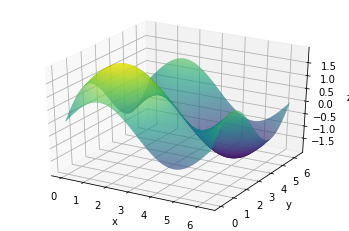

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.scatter(X, Y, Z1, cmap='viridis', linewidth=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

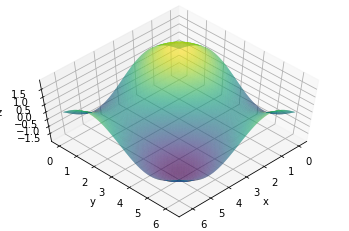

In [5]:
ax.view_init(60, 45)
fig

# Noise

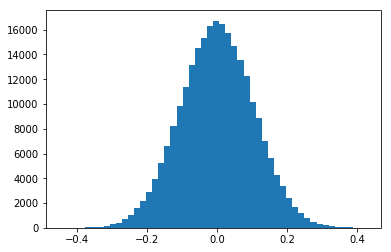

In [6]:
SAMPLES = 250000
mu = 0 
sigma = 2*np.pi*0.1/6
noise = np.random.randn(SAMPLES)*sigma + mu
plt.hist(noise,50)
noise = np.reshape(noise,(500,500))

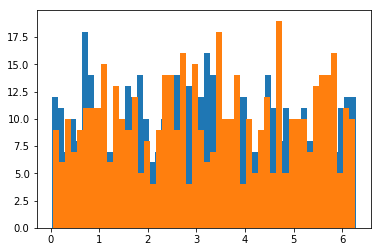

In [7]:
NUM_VALUE = 500
x_value = np.random.uniform(low=0, high=2*np.pi, size=NUM_VALUE)
y_value = np.random.uniform(low=0, high=2*np.pi, size=NUM_VALUE)
np.random.shuffle(x_value)
np.random.shuffle(y_value)
plt.hist(x_value,50)
plt.hist(y_value,50)
X_value, Y_value = np.meshgrid(x_value, y_value)
Z_value_real = func(X_value, Y_value)
Z_value = Z_value_real + noise

Text(0.5, 0, 'z')

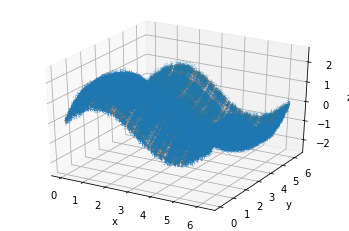

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_value, Y_value, Z_value, s=0.1, cmap='viridis', linewidth=0.5)
ax.scatter(X_value, Y_value, Z_value_real, s=0.1, cmap='viridis', linewidth=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

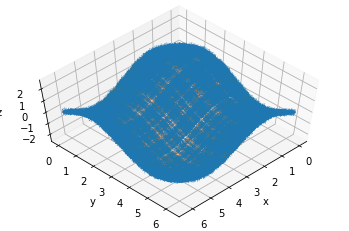

In [9]:
ax.view_init(60, 45)
fig

# Process data

In [10]:
print(x_value[:5])

[5.71942554 3.17748251 1.73021874 5.94816595 1.63014392]


In [11]:
print(y_value[:5])

[2.70542338 4.9149557  1.13655634 4.84724954 5.18009491]


In [12]:
print(Z_value_real)

[[-0.11189743  0.38658833  1.40978963 ...  1.19067914  1.37612104
   0.25078755]
 [-1.51392134 -1.01543558  0.00776572 ... -0.21134477 -0.02590287
  -1.15123636]
 [ 0.37282214  0.8713079   1.8945092  ...  1.67539871  1.86084061
   0.73550712]
 ...
 [-1.01044519 -0.51195942  0.51124187 ...  0.29213138  0.47757329
  -0.64776021]
 [-1.36997068 -0.87148492  0.15171637 ... -0.06739412  0.11804779
  -1.00728571]
 [-1.45695941 -0.95847365  0.06472764 ... -0.15438285  0.03105906
  -1.09427444]]


In [13]:
x_data = []
for y_ in y_value:
    for x_ in x_value:
        x_data.append([x_,y_]) 
Z_data = []
for row in Z_value:
    for z_ in row:
        Z_data.append(z_)
x_data = np.array(x_data)
Z_data = np.array(Z_data)

In [14]:
print(x_data.shape, Z_data.shape)

(250000, 2) (250000,)


# Split data

In [15]:
SAMPLES = 250000
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT )
print(TEST_SPLIT,TRAIN_SPLIT)

200000 150000


In [16]:
x_train, x_test, x_validate = np.split(x_data, [TRAIN_SPLIT, TEST_SPLIT])
Z_train, Z_test, Z_validate = np.split(Z_data, [TRAIN_SPLIT, TEST_SPLIT])

In [17]:
print(x_train.shape,x_test.shape,x_validate.shape)

(150000, 2) (50000, 2) (50000, 2)


# Design model

In [18]:
import tensorflow as tf
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

model_1.add(layers.Dense(16, input_dim=2, activation='relu'))

model_1.add(layers.Dense(16, activation='relu'))

model_1.add(layers.Dense(16, activation='sigmoid'))

model_1.add(layers.Dense(1))

model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

W1005 09:48:31.690052 140283544057600 deprecation.py:506] From /home/philong/.virtualenvs/dl/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
history_1 = model_1.fit(x_train,Z_train, epochs=1000, batch_size=512,
                    validation_data=(x_validate,Z_validate))

Train on 150000 samples, validate on 50000 samples
Epoch 1/1000
150000/150000 [==============================] - 1s 8us/sample - loss: 0.4192 - mean_absolute_error: 0.5168 - val_loss: 0.2404 - val_mean_absolute_error: 0.3981
Epoch 2/1000
150000/150000 [==============================] - 1s 5us/sample - loss: 0.1728 - mean_absolute_error: 0.3364 - val_loss: 0.1294 - val_mean_absolute_error: 0.2899
Epoch 3/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.1062 - mean_absolute_error: 0.2550 - val_loss: 0.0840 - val_mean_absolute_error: 0.2253
Epoch 4/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0762 - mean_absolute_error: 0.2084 - val_loss: 0.0608 - val_mean_absolute_error: 0.1856
Epoch 5/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0566 - mean_absolute_error: 0.1752 - val_loss: 0.0441 - val_mean_absolute_error: 0.1557
Epoch 6/1000
150000/150000 [==============================] - 1s 4us/sample - l

150000/150000 [==============================] - 1s 3us/sample - loss: 0.0124 - mean_absolute_error: 0.0886 - val_loss: 0.0121 - val_mean_absolute_error: 0.0877
Epoch 48/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0124 - mean_absolute_error: 0.0885 - val_loss: 0.0115 - val_mean_absolute_error: 0.0854
Epoch 49/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0124 - mean_absolute_error: 0.0886 - val_loss: 0.0115 - val_mean_absolute_error: 0.0855
Epoch 50/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0124 - mean_absolute_error: 0.0886 - val_loss: 0.0122 - val_mean_absolute_error: 0.0880
Epoch 51/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0124 - mean_absolute_error: 0.0885 - val_loss: 0.0117 - val_mean_absolute_error: 0.0861
Epoch 52/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0123 - mean_absolute_error: 0.0885 - val_loss: 0.012

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0122 - mean_absolute_error: 0.0878 - val_loss: 0.0124 - val_mean_absolute_error: 0.0887
Epoch 94/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0121 - mean_absolute_error: 0.0878 - val_loss: 0.0117 - val_mean_absolute_error: 0.0862
Epoch 95/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0122 - mean_absolute_error: 0.0879 - val_loss: 0.0113 - val_mean_absolute_error: 0.0847
Epoch 96/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0121 - mean_absolute_error: 0.0877 - val_loss: 0.0122 - val_mean_absolute_error: 0.0880
Epoch 97/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0121 - mean_absolute_error: 0.0877 - val_loss: 0.0115 - val_mean_absolute_error: 0.0857
Epoch 98/1000
150000/150000 [==============================] - 1s 7us/sample - loss: 0.0121 - mean_absolute_error: 0.0877 - val_loss: 0.011

Epoch 140/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0120 - mean_absolute_error: 0.0874 - val_loss: 0.0123 - val_mean_absolute_error: 0.0884
Epoch 141/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0120 - mean_absolute_error: 0.0871 - val_loss: 0.0114 - val_mean_absolute_error: 0.0852
Epoch 142/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0120 - mean_absolute_error: 0.0874 - val_loss: 0.0115 - val_mean_absolute_error: 0.0855
Epoch 143/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0120 - mean_absolute_error: 0.0873 - val_loss: 0.0117 - val_mean_absolute_error: 0.0862
Epoch 144/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0120 - mean_absolute_error: 0.0874 - val_loss: 0.0126 - val_mean_absolute_error: 0.0893
Epoch 145/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0120 - mean_absolute_error: 0.08

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0120 - mean_absolute_error: 0.0871 - val_loss: 0.0113 - val_mean_absolute_error: 0.0849
Epoch 187/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0119 - mean_absolute_error: 0.0870 - val_loss: 0.0115 - val_mean_absolute_error: 0.0855
Epoch 188/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0119 - mean_absolute_error: 0.0871 - val_loss: 0.0127 - val_mean_absolute_error: 0.0897
Epoch 189/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0119 - mean_absolute_error: 0.0870 - val_loss: 0.0114 - val_mean_absolute_error: 0.0852
Epoch 190/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0119 - mean_absolute_error: 0.0871 - val_loss: 0.0113 - val_mean_absolute_error: 0.0849
Epoch 191/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0119 - mean_absolute_error: 0.0871 - val_loss: 

150000/150000 [==============================] - 1s 5us/sample - loss: 0.0119 - mean_absolute_error: 0.0868 - val_loss: 0.0112 - val_mean_absolute_error: 0.0846
Epoch 233/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0119 - mean_absolute_error: 0.0868 - val_loss: 0.0119 - val_mean_absolute_error: 0.0869
Epoch 234/1000
150000/150000 [==============================] - 1s 6us/sample - loss: 0.0119 - mean_absolute_error: 0.0869 - val_loss: 0.0114 - val_mean_absolute_error: 0.0851
Epoch 235/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0867 - val_loss: 0.0127 - val_mean_absolute_error: 0.0899
Epoch 236/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0119 - mean_absolute_error: 0.0869 - val_loss: 0.0115 - val_mean_absolute_error: 0.0857
Epoch 237/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0119 - mean_absolute_error: 0.0869 - val_loss: 

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0867 - val_loss: 0.0113 - val_mean_absolute_error: 0.0849
Epoch 279/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0867 - val_loss: 0.0113 - val_mean_absolute_error: 0.0848
Epoch 280/1000
150000/150000 [==============================] - 1s 5us/sample - loss: 0.0118 - mean_absolute_error: 0.0866 - val_loss: 0.0115 - val_mean_absolute_error: 0.0858
Epoch 281/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0866 - val_loss: 0.0124 - val_mean_absolute_error: 0.0888
Epoch 282/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0868 - val_loss: 0.0116 - val_mean_absolute_error: 0.0860
Epoch 283/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0867 - val_loss: 

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0866 - val_loss: 0.0114 - val_mean_absolute_error: 0.0851
Epoch 325/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0865 - val_loss: 0.0112 - val_mean_absolute_error: 0.0845
Epoch 326/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0118 - mean_absolute_error: 0.0866 - val_loss: 0.0118 - val_mean_absolute_error: 0.0866
Epoch 327/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0865 - val_loss: 0.0113 - val_mean_absolute_error: 0.0849
Epoch 328/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0866 - val_loss: 0.0121 - val_mean_absolute_error: 0.0876
Epoch 329/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0118 - mean_absolute_error: 0.0866 - val_loss: 

150000/150000 [==============================] - 0s 3us/sample - loss: 0.0118 - mean_absolute_error: 0.0865 - val_loss: 0.0117 - val_mean_absolute_error: 0.0861
Epoch 371/1000
150000/150000 [==============================] - 1s 5us/sample - loss: 0.0117 - mean_absolute_error: 0.0864 - val_loss: 0.0114 - val_mean_absolute_error: 0.0852
Epoch 372/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0112 - val_mean_absolute_error: 0.0843
Epoch 373/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0865 - val_loss: 0.0115 - val_mean_absolute_error: 0.0855
Epoch 374/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0118 - mean_absolute_error: 0.0864 - val_loss: 0.0113 - val_mean_absolute_error: 0.0849
Epoch 375/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0862 - val_loss: 

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0864 - val_loss: 0.0116 - val_mean_absolute_error: 0.0860
Epoch 417/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0864 - val_loss: 0.0113 - val_mean_absolute_error: 0.0847
Epoch 418/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0121 - val_mean_absolute_error: 0.0876
Epoch 419/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0126 - val_mean_absolute_error: 0.0896
Epoch 420/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0115 - val_mean_absolute_error: 0.0855
Epoch 421/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0114 - val_mean_absolute_error: 0.0851
Epoch 463/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0118 - val_mean_absolute_error: 0.0866
Epoch 464/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0115 - val_mean_absolute_error: 0.0855
Epoch 465/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0862 - val_loss: 0.0112 - val_mean_absolute_error: 0.0846
Epoch 466/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0862 - val_loss: 0.0121 - val_mean_absolute_error: 0.0875
Epoch 467/1000
150000/150000 [==============================] - 1s 5us/sample - loss: 0.0117 - mean_absolute_error: 0.0862 - val_loss: 

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0862 - val_loss: 0.0112 - val_mean_absolute_error: 0.0845
Epoch 509/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0861 - val_loss: 0.0114 - val_mean_absolute_error: 0.0852
Epoch 510/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0861 - val_loss: 0.0119 - val_mean_absolute_error: 0.0868
Epoch 511/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 0.0112 - val_mean_absolute_error: 0.0845
Epoch 512/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0863 - val_loss: 0.0115 - val_mean_absolute_error: 0.0855
Epoch 513/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0117 - mean_absolute_error: 0.0862 - val_loss: 

150000/150000 [==============================] - 0s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0862 - val_loss: 0.0119 - val_mean_absolute_error: 0.0869
Epoch 555/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0861 - val_loss: 0.0113 - val_mean_absolute_error: 0.0848
Epoch 556/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0861 - val_loss: 0.0115 - val_mean_absolute_error: 0.0855
Epoch 557/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0117 - mean_absolute_error: 0.0861 - val_loss: 0.0116 - val_mean_absolute_error: 0.0861
Epoch 558/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 0.0113 - val_mean_absolute_error: 0.0849
Epoch 559/1000
150000/150000 [==============================] - 1s 5us/sample - loss: 0.0117 - mean_absolute_error: 0.0861 - val_loss: 

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 0.0113 - val_mean_absolute_error: 0.0847
Epoch 601/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 0.0114 - val_mean_absolute_error: 0.0851
Epoch 602/1000
150000/150000 [==============================] - 1s 5us/sample - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 0.0115 - val_mean_absolute_error: 0.0854
Epoch 603/1000
150000/150000 [==============================] - 1s 6us/sample - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 0.0111 - val_mean_absolute_error: 0.0842
Epoch 604/1000
150000/150000 [==============================] - 1s 5us/sample - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 0.0113 - val_mean_absolute_error: 0.0847
Epoch 605/1000
150000/150000 [==============================] - 1s 5us/sample - loss: 0.0116 - mean_absolute_error: 0.0860 - val_loss: 

150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 0.0121 - val_mean_absolute_error: 0.0877
Epoch 647/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 0.0112 - val_mean_absolute_error: 0.0844
Epoch 648/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 0.0111 - val_mean_absolute_error: 0.0842
Epoch 649/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 0.0116 - val_mean_absolute_error: 0.0860
Epoch 650/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 0.0117 - val_mean_absolute_error: 0.0862
Epoch 651/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 

150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 0.0129 - val_mean_absolute_error: 0.0905
Epoch 693/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0111 - val_mean_absolute_error: 0.0840
Epoch 694/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0113 - val_mean_absolute_error: 0.0848
Epoch 695/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0115 - val_mean_absolute_error: 0.0856
Epoch 696/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0113 - val_mean_absolute_error: 0.0849
Epoch 697/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 

150000/150000 [==============================] - 1s 5us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0113 - val_mean_absolute_error: 0.0849
Epoch 739/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0112 - val_mean_absolute_error: 0.0845
Epoch 740/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0124 - val_mean_absolute_error: 0.0890
Epoch 741/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0113 - val_mean_absolute_error: 0.0847
Epoch 742/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0117 - val_mean_absolute_error: 0.0861
Epoch 743/1000
150000/150000 [==============================] - 1s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0857 - val_loss: 0.0114 - val_mean_absolute_error: 0.0851
Epoch 785/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0112 - val_mean_absolute_error: 0.0842
Epoch 786/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0116 - mean_absolute_error: 0.0858 - val_loss: 0.0116 - val_mean_absolute_error: 0.0859
Epoch 787/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0857 - val_loss: 0.0112 - val_mean_absolute_error: 0.0846
Epoch 788/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0857 - val_loss: 0.0112 - val_mean_absolute_error: 0.0842
Epoch 789/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0116 - mean_absolute_error: 0.0857 - val_loss: 

150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0857 - val_loss: 0.0118 - val_mean_absolute_error: 0.0867
Epoch 831/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0857 - val_loss: 0.0117 - val_mean_absolute_error: 0.0864
Epoch 832/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0857 - val_loss: 0.0119 - val_mean_absolute_error: 0.0869
Epoch 833/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0116 - mean_absolute_error: 0.0857 - val_loss: 0.0114 - val_mean_absolute_error: 0.0853
Epoch 834/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0111 - val_mean_absolute_error: 0.0841
Epoch 835/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0857 - val_loss: 

150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0857 - val_loss: 0.0112 - val_mean_absolute_error: 0.0842
Epoch 877/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0111 - val_mean_absolute_error: 0.0842
Epoch 878/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0121 - val_mean_absolute_error: 0.0876
Epoch 879/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0116 - val_mean_absolute_error: 0.0857
Epoch 880/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0114 - val_mean_absolute_error: 0.0852
Epoch 881/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 

150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0115 - val_mean_absolute_error: 0.0854
Epoch 923/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0114 - val_mean_absolute_error: 0.0850
Epoch 924/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0855 - val_loss: 0.0111 - val_mean_absolute_error: 0.0841
Epoch 925/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0855 - val_loss: 0.0121 - val_mean_absolute_error: 0.0880
Epoch 926/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0113 - val_mean_absolute_error: 0.0846
Epoch 927/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 

150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0114 - val_mean_absolute_error: 0.0853
Epoch 969/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0855 - val_loss: 0.0117 - val_mean_absolute_error: 0.0861
Epoch 970/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0855 - val_loss: 0.0111 - val_mean_absolute_error: 0.0842
Epoch 971/1000
150000/150000 [==============================] - 0s 3us/sample - loss: 0.0115 - mean_absolute_error: 0.0855 - val_loss: 0.0118 - val_mean_absolute_error: 0.0866
Epoch 972/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0112 - val_mean_absolute_error: 0.0844
Epoch 973/1000
150000/150000 [==============================] - 1s 4us/sample - loss: 0.0115 - mean_absolute_error: 0.0855 - val_loss: 

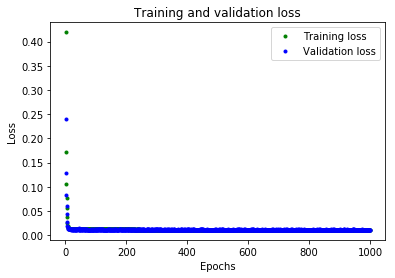

In [22]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

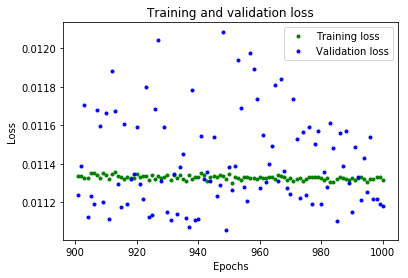

In [37]:
SKIP = 900
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Train model with TF_Estimator

# Predict

In [23]:
x_predict = []
NUM_PREDICT = 500
for i in range(NUM_PREDICT):
    x_ = np.random.uniform(low=0, high=2*np.pi, size=1)
    for j in range(NUM_PREDICT):
        y_ = np.random.uniform(low=0, high=2*np.pi, size=1)
        x_predict.append([x_,y_])
x_predict = np.array(x_predict)
x_predict = np.squeeze(x_predict)
print(x_predict.shape)

(250000, 2)


In [24]:
predictions = model_1.predict(x_predict)

In [25]:
x_plot = [a[0] for a in x_predict]
y_plot = [a[1] for a in x_predict]

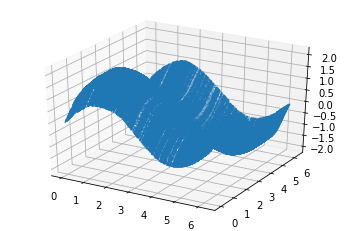

In [26]:
fig1 = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x_plot, y_plot, predictions,s=0.1, cmap='Greens')

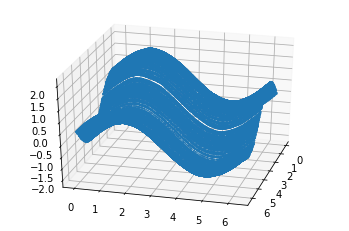

In [85]:
ax1.view_init(30, 15)
fig1